<h1> Project: Real estate market analysis version 1 - Argentina Dataset</h1>

Dataset:portal [Properati](www.properati.com.ar).

### 2. Exploratory Data Analysis


Cols definition [here](https://www.properati.com.ar/data/).

`Capital Federal` refers to the City of Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste`are regions of [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires).

0. Libreries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

1. Dataset

In [4]:
df=pd.read_csv("..\datasets\DS_Proyecto_01_Datos_Properati.csv")

In [5]:
print('--dataset size--')
print('Rows:',df.shape[0])
print('Cols:',df.shape[1])
df.head()

--dataset size--
Rows: 146660
Cols: 19


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [7]:
df.describe()
#los datos interesantes vendria a ser que minimo cada propiedad tiene 1 bathroom y que se manejan 
#propiedades relativamente pequeñas 10.000000 m2

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


2. **Missing values**

In [8]:
#pandas is built on top of numpy, which has neither na nor null values. Then isnull do the same as isna
#df.isnull().sum()
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Property types**

In [9]:
tipos_propiedad=df.groupby(['property_type']).size().reset_index(name='counts')
print('--Property types--')
print(tipos_propiedad.sort_values('counts', ascending=False))

--Property types--
     property_type  counts
3     Departamento  107326
0             Casa   21521
9               PH   14298
6             Lote    1312
7          Oficina     658
8             Otro     374
5  Local comercial     325
1    Casa de campo     322
4         Depósito     265
2          Cochera     259


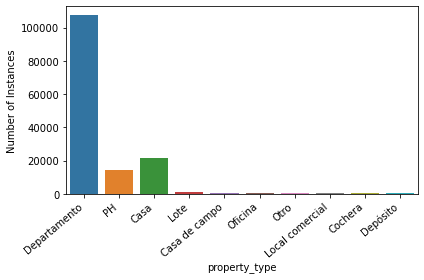

In [10]:
ax=sns.countplot(x='property_type',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(ylabel = "Number of Instances")
plt.tight_layout()
plt.show()

**Distribution for numerical variables:** 

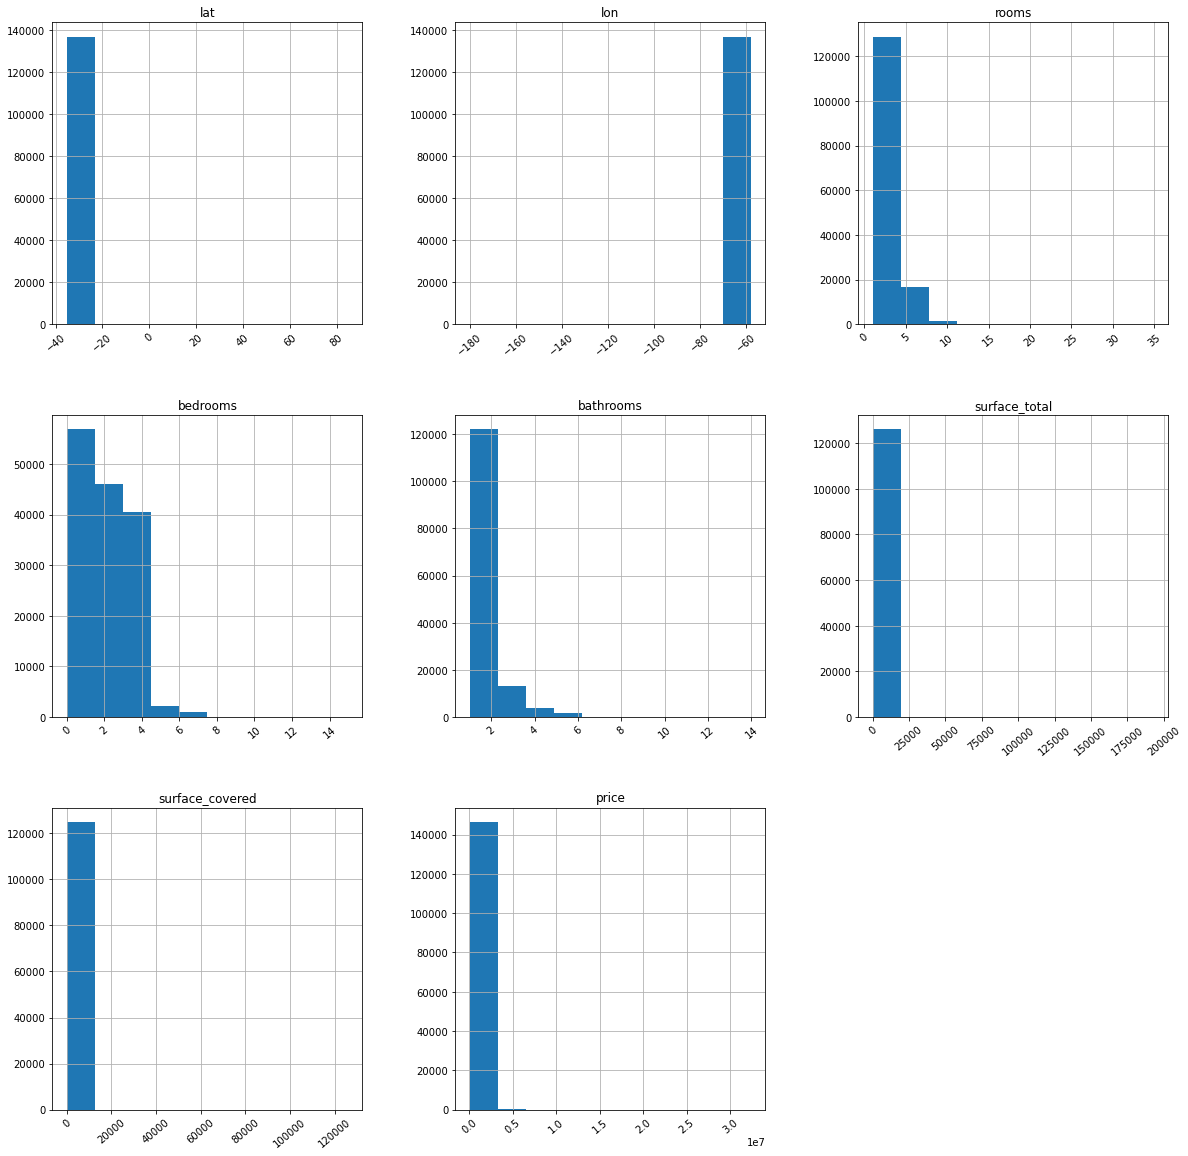

In [11]:
hist = df.hist(xrot=40,figsize=(20, 20))

In [12]:
df['operation_type'].unique()

array(['Venta'], dtype=object)

4. ubication-regions

In [13]:
def group_and_count(col):
    data_grouped=df.groupby(col, as_index=False).agg(
    counts=(col, 'count'))
    data_grouped=data_grouped.sort_values('counts',ascending=False)
    data_grouped = data_grouped.reset_index(drop=True)  #reseteo el indice de acuerdo al sort
    return data_grouped

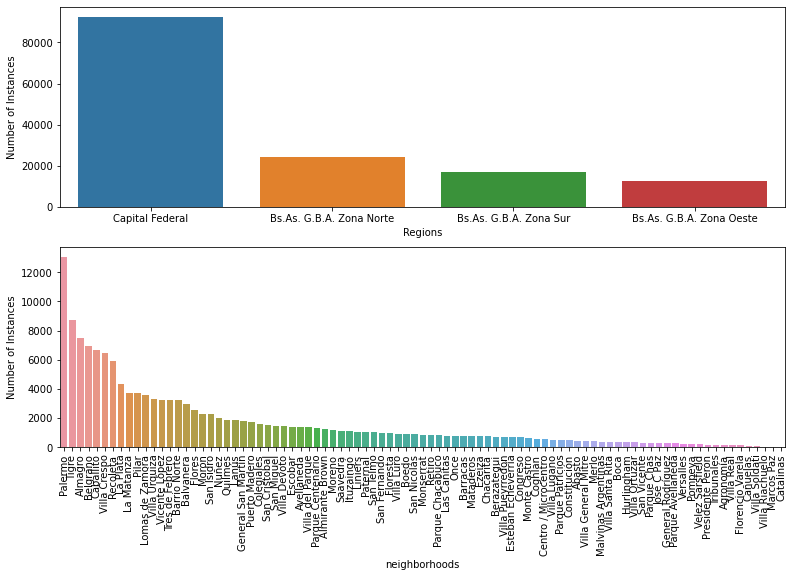

In [14]:
dimension=(13,8.1)
ax1=1
ax2=2
fig1,(ax1,ax2)=plt.subplots(2,1,figsize=dimension) # los numeros me indican la cantidad de graficos a manejar 2 filas 1 columna

data_l2=group_and_count('l2')
plotl2=sns.barplot(y=data_l2['counts'],x=data_l2.l2,ax=ax1)
plotl2.set(xlabel="Regions",ylabel = "Number of Instances")

data_l3=group_and_count('l3')
plotl3=sns.barplot(y=data_l3['counts'],x=data_l3.l3,ax=ax2)
plotl3.set(xlabel="neighborhoods",ylabel = "Number of Instances")
plotl3.set_xticklabels(ax2.get_xticklabels(),rotation=90)

print("")

In the previous graphs it is visualized that the majority of properties are in the Federal Capital (l2), and in Palermo (l3)

5. **Filtering:** 

In [15]:
#argmax returns the position of the largest value. max returns the largest value. 
#unravel_index the function transfers the indices in a flatten array back to its unflatten version.
def mayorescolumnas(full, n):
    full = full.copy()
    nombre_columna=full.columns[0]
    y = []
    for idx in range(n):
        temp_x = np.unravel_index(full['counts'].argmax(), full['counts'].shape)[0]
        y.append(full.loc[temp_x,nombre_columna])
        full[full['counts'] == full['counts'].max()] = 0.
    return y

In [16]:
mas_tipospropiedad=mayorescolumnas(tipos_propiedad,3)
mas_l2=mayorescolumnas(data_l2,1)
filter1= df['l2'].isin(mas_l2)
filter2= df['property_type'].isin(mas_tipospropiedad)
dfn=df[filter1 & filter2]
print(dfn.shape)


(91485, 19)


6. **Distribution and pairwise relationships of variables:**

In [17]:
#A.estadisticos
newdf=dfn.iloc[0:, 8:14]
newdf.describe()
#newdf.describe().astype (int) #mejor visualizacion

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [18]:
#Missing values
dfn.isnull().sum()
#newdf.shape

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [19]:
dfv1 = dfn.copy()
dfv1 = dfv1.dropna(axis = 0, how ='any')
dfv1.shape

(76961, 19)

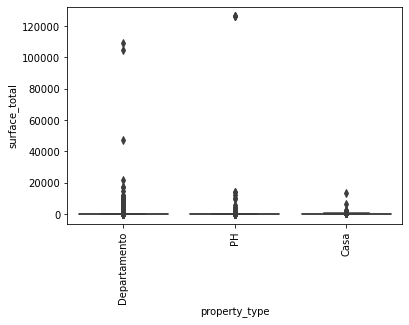

In [20]:
#Boxplot  for outliers
ax=sns.boxplot(x=dfv1["property_type"], y=dfv1["surface_total"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
#se pueden visualizar outliers con surface_total mayores a 40000 m2

In [21]:
def encontrarquantile(dfr,columna):
    #Definicion de quartiles para Q1 is the first quartile of the data, i.e., to say .
    Q1 = np.quantile(dfr[columna],0.25) #25% of the data lies between minimum and Q1
    Q3 = np.quantile(dfr[columna],0.75) #75% of the data lies between minimum and Q3.
    IQR = Q3 - Q1 # Inter-Quartile Range 
    #B y C.Retiro de Outliers utilizando IQR
    #decision range Lower Bound: (Q1 - 1.5 * IQR), Upper Bound: (Q3 + 1.5 * IQR)
    #Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.
    dfr = dfr[(dfr[columna]<(Q3+1.5*IQR)) & (dfr[columna]>(Q1-1.5*IQR))]
    return dfr
    

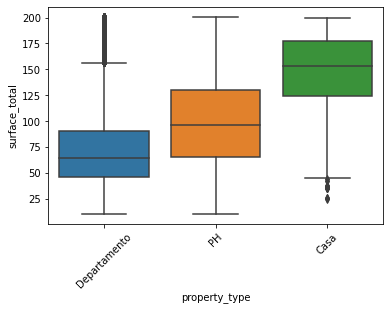

(71154, 19)

In [22]:
dfv1=encontrarquantile(dfv1,'surface_total')
ax=sns.boxplot(x=dfv1["property_type"], y=dfv1["surface_total"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

dfv1.shape

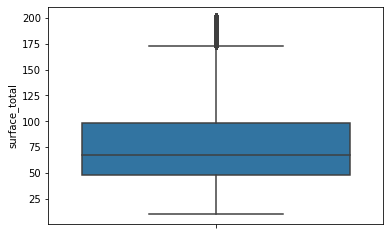

In [23]:
#final variation of surface_total for the entire dataset
sns.boxplot(y=dfv1["surface_total"])
plt.show()

In [24]:
dfv1 = dfv1.drop(dfv1[dfv1.surface_total < dfv1.surface_covered].index)
dfv1.shape

(70494, 19)

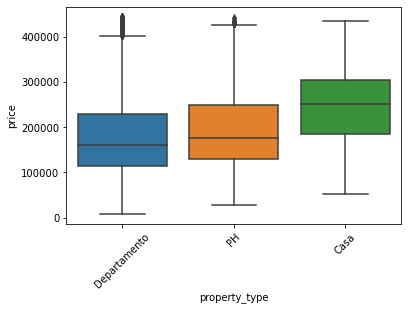

(66234, 19)

In [27]:
#Outliers for price
dfv2=encontrarquantile(dfv1,'price')
ax=sns.boxplot(x=dfv2["property_type"], y=dfv2["price"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

dfv2.shape

In [28]:
dfv3 = dfv2.copy()
dfv3.drop(dfv2.columns[[0, 1, 2, 3, 4, 5, 6, 7,14, 15, 16, 18]], axis = 1, inplace = True)
dfv3.shape

(66234, 7)

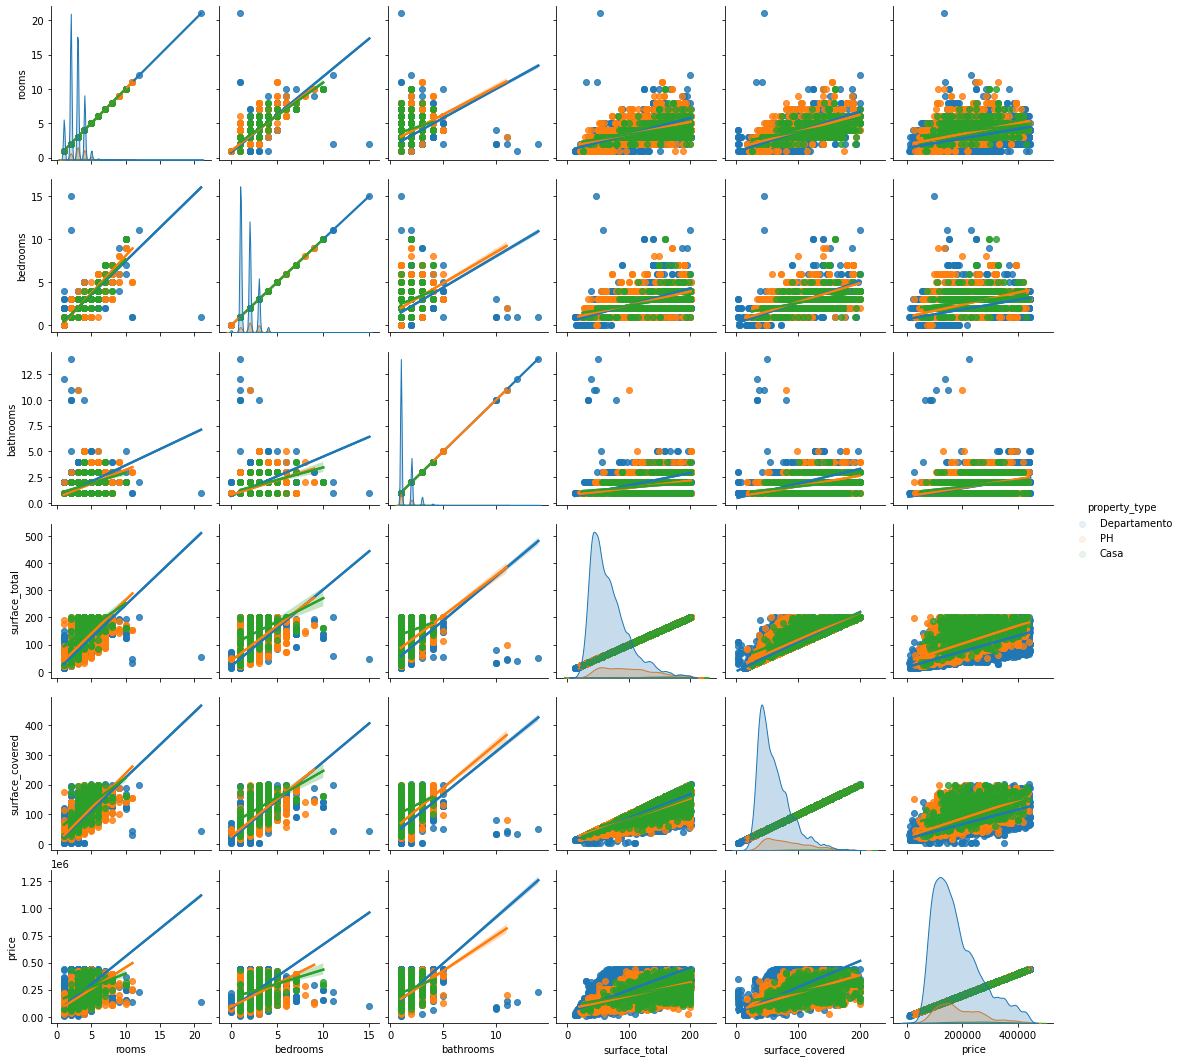

In [29]:
g=sns.pairplot(dfv3, hue = 'property_type',kind="reg", plot_kws={'scatter_kws': {'alpha': 0.1}})
g.map(sns.regplot)

Group by property types, then:
* The property of type `PH` and `apartment` are the ones that come to cost more, in the case of `apartment` this occurs even if surface_total is below the average.
* the relationship between `surface_covered` and `surface_total` is validated so that `surface_covered` cannot be greater than surface_total
* It seems that there is no positive or negative relationship between `bathrooms` and `price`, its possible to have properties with 1 or 5 `bathrooms` and the `price` can be high in both cases.
* `rooms` and `bedrooms`: more than half of the data fall below the linear relationship, and their distribution looks similar, so it would be preferable to analyze the correlation for each type of property.

7. **Correlations:**

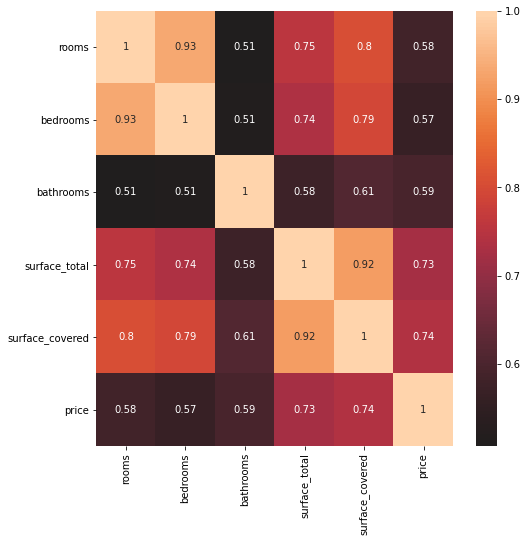

In [30]:
#Heat map
cdata = dfv3.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cdata, cbar = True, annot=True,center=0.5,vmax=1)#vmin =0 ya que el menor valor esperado es 0
plt.show()
#Values closer to zero means there is no linear trend between the two variables
#The close to 1 the correlation is the more positively correlated they are

Since they all present a correlation coefficient greater than 0.50, there should be a linear trend between all the variables; the most notable is the ratio of 0.93 between `rooms` and `bedrooms`, followed by `surface_total` and `surface_covered` with 0.92, these could predict each other. The ones that most influence the `price` would be `surface_total` and `surface_covered`.

In [31]:
#Filters
Filter_c = dfv3["property_type"].isin(["Casa"])
datanew_c = dfv3[Filter_c]

Filter_ph = dfv3["property_type"].isin(["PH"])
datanew_ph = dfv3[Filter_ph]

Filter_dept = dfv3["property_type"].isin(["Departamento"])
datanew_dept = dfv3[Filter_dept]

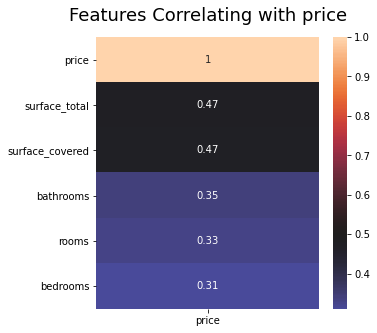

In [32]:
#For "Casa"
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(datanew_c.corr()[['price']].sort_values(by='price', ascending=False), center=0.5, vmax=1, annot=True)
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

Although they do not reach zero, they are not greater than 0.5 either, so there would not be a strong correlation with `Price`, for the type of property of "Casa"

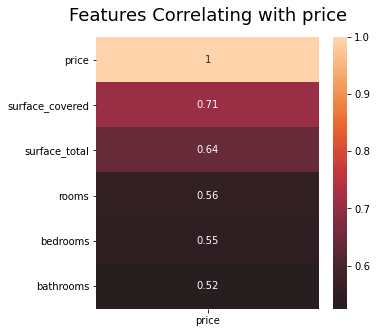

In [33]:
#For "PH"
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(datanew_ph.corr()[['price']].sort_values(by='price', ascending=False), center=0.5, vmax=1, annot=True)
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

There is a strong correlation between price and all variables, being the best to predict `surface_covered`

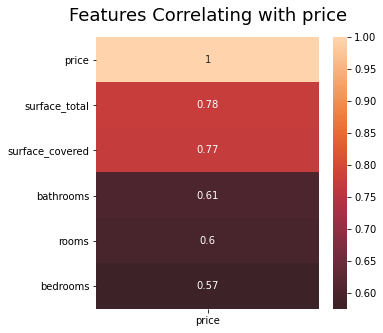

In [34]:
#For "Departamento"
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(datanew_dept.corr()[['price']].sort_values(by='price', ascending=False), center=0.5, vmax=1, annot=True)
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

There is a strong correlation between price and all variables, being the best to predict `surface_covered`

### 2.1 Insights

Proposed question: in what months of the year are the cheapest ads published for the most expensive neighborhood in Buenos Aires

In [39]:
desafio=dfv2.copy()
desafio.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,66234.000000,66234.000000,66234.000000,66234.000000,66234.000000,66234.000000,66234.000000,66234.000000
mean,-34.599045,-58.436647,2.755971,1.811320,1.356871,73.493402,64.729610,182419.291663
std,0.022996,0.034650,1.049273,0.890983,0.613952,35.583656,29.915899,85240.638493
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,13.000000,2.000000,7500.000000
25%,-34.612337,-58.458970,2.000000,1.000000,1.000000,47.000000,42.000000,118000.000000
50%,-34.599767,-58.434080,3.000000,2.000000,1.000000,65.000000,57.000000,162000.000000
75%,-34.586078,-58.412880,3.000000,2.000000,2.000000,90.000000,80.000000,230000.000000
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,201.000000,201.000000,444100.000000


In [40]:
#neighborhood in Buenos Aires
mas_caros = pd.pivot_table(desafio, values='price', index=['l3'], aggfunc=np.mean)
mas_caros = mas_caros.sort_values('price', ascending=False).iloc[:5] #encuentro los 5 barrios mas caros y los ordeno por price
barrio_mas_caro=mas_caros.iloc[0].name # el 1ro de la lista es el mas caro
print(barrio_mas_caro)

Puerto Madero


In [42]:
#Filter
desafio=desafio[desafio.l3.isin([barrio_mas_caro])]
desafio.shape 

(305, 19)

In [43]:
#minimum value and the average, where "cheap" would be between the minimum and the average
dmean=desafio.price.mean()
dmin=desafio.price.min()
desafio=desafio[(desafio.price<dmean) & (desafio.price>=dmin)]
desafio.shape 

(142, 19)

In [44]:
desafio['start_date'] = pd.to_datetime(desafio['start_date'], format='%Y-%m-%d')
desafio.start_date.dt.month

373       3
2660      9
2662      9
3546      3
4012      1
         ..
137865    7
137866    7
138148    7
138840    7
140957    7
Name: start_date, Length: 142, dtype: int64

<AxesSubplot:xlabel='start_date', ylabel='price'>

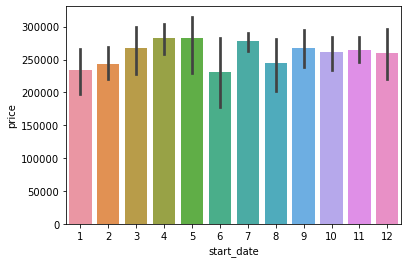

In [45]:
#visualize
sns.barplot(x=desafio["start_date"].dt.month, y=desafio["price"], data=desafio)

It can be seen that more cheap ads have been published for the most expensive neighborhood in January and June.

### 2.2 +external dataset
Dataset :https://www.kaggle.com/rmjacobsen/property-listings-for-5-south-american-countries?select=pe_properties.csv

Considering that `L3` for Argentina is "Neighborhoods" and for Peru "Districts" being this the 4th administrative division in the external dataset: In which Country would be preferable to buy an Apartment that is in the most expensive area?

In [46]:
#carga del dataset externo
dfperu=pd.read_csv("..\datasets\pe_properties.csv")

#dataset de properati con el que comparare
desafio2=dfv2.copy()

dfperu.shape

(124449, 25)

In [47]:
#visualizamos el dataset externo
dfperu.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,OHnwRj8WCByyWFlzr8CG2w==,Propiedad,2019-06-25,2019-07-23,2019-06-25,-12.094636,-77.003267,Perú,Lima,Lima,...,NaN,207.0,120.0,380000.0,USD,Mensual,SE VENDE CASITA SAN BORJA NORTE 446 4 HABITACI...,Se vende CASITA en condominio La casita empiez...,Casa,Venta
1,+r81Zjmgyd2Y+cguWfoHhw==,Propiedad,2019-06-25,2019-12-25,2019-06-25,-12.094851,-77.017706,Perú,Lima,Lima,...,NaN,347.0,319.0,800000.0,USD,Mensual,VENDO ELEGANTE CASA EN SAN ISIDRO,VENDO ELEGANTE CASA EN SAN ISIDRO. AMPLIA SALA...,Casa,Venta
2,TP2j5KyjkY1glXvrCBoqkA==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-12.071644,-77.037922,Perú,Lima,Lima,...,NaN,500.0,500.0,2250000.0,USD,Mensual,¡ Se vende Terreno en Excelente Zona de Jesus ...,"Casa como terreno en venta, ubicada en toda un...",Casa,Venta
3,PF2/BiUsiKTU8i7mFBGq3A==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-11.960901,-77.062730,Perú,Lima,Lima,...,NaN,224.0,126.0,152000.0,USD,Mensual,SE VENDE LINDA CASA EN LA MISMA AV METROPOLITA...,"LINDA CASA EN VENTA, FRENTE AL CENTRO DE IDIOM...",Casa,Venta
4,LgOzukt3/c7bYO7SNzFbUw==,Propiedad,2019-06-25,2019-07-10,2019-06-25,-12.102991,-76.938083,Perú,Lima,Lima,...,NaN,378.0,320.0,490000.0,USD,Mensual,SE VENDE HERMOSA Y AMPLIA CASA EN LA MOLINA,Se vende hermosa casa en La Molina 5 Habitacio...,Casa,Venta


In [48]:
#Currency para price, datasetexterno
dfperu['currency'].unique()

array(['USD', 'PEN', nan, 'ARS'], dtype=object)

In [49]:
#In this case the properti only has prices in USD, therefore I will filter the external dataset to review only USD
desafio2['currency'].unique()

array(['USD'], dtype=object)

In [50]:
#2 comparable groups
dfperu=dfperu[dfperu.currency.isin(['USD'])]
filter3= dfperu['currency'].isin(['USD'])
filter4= dfperu['property_type'].isin(['Departamento'])
dfp=dfperu[filter3 & filter4]
dfp.shape

(40036, 25)

In [51]:
df_l3=barrio_mas_caro
print(df_l3)

Puerto Madero


In [52]:
filter5= desafio2['l3'].isin(['Puerto Madero'])
filter6= desafio2['property_type'].isin(['Departamento'])
desafio2=desafio2[filter5 & filter6]
desafio2.shape
#there are 305 instances for the most expensive neighborhood in Buenos Aires

(305, 19)

In [53]:
#Mean
media2=desafio2.price.mean()
print(media2)

323708.83278688526


In [54]:
#For Peru Dataset
peru=dfp.groupby(by='l4')['price'].mean()
peru = peru.sort_values(ascending=False).iloc[:5]
print(peru)

l4
Huancavelica    6.000000e+06
Calca           7.564000e+05
Cieneguilla     3.216364e+05
San Isidro      2.855863e+05
Puno            2.727500e+05
Name: price, dtype: float64


comparing the means with that of Puerto Madero for the Argentina dataset, Cieneguilla or San Isidro could be chosen, both located in Lima, capital of Peru, Cieneguilla being an almost rural district and San Isidro totally urban, Considering this detail, San Isidro will be chosen.

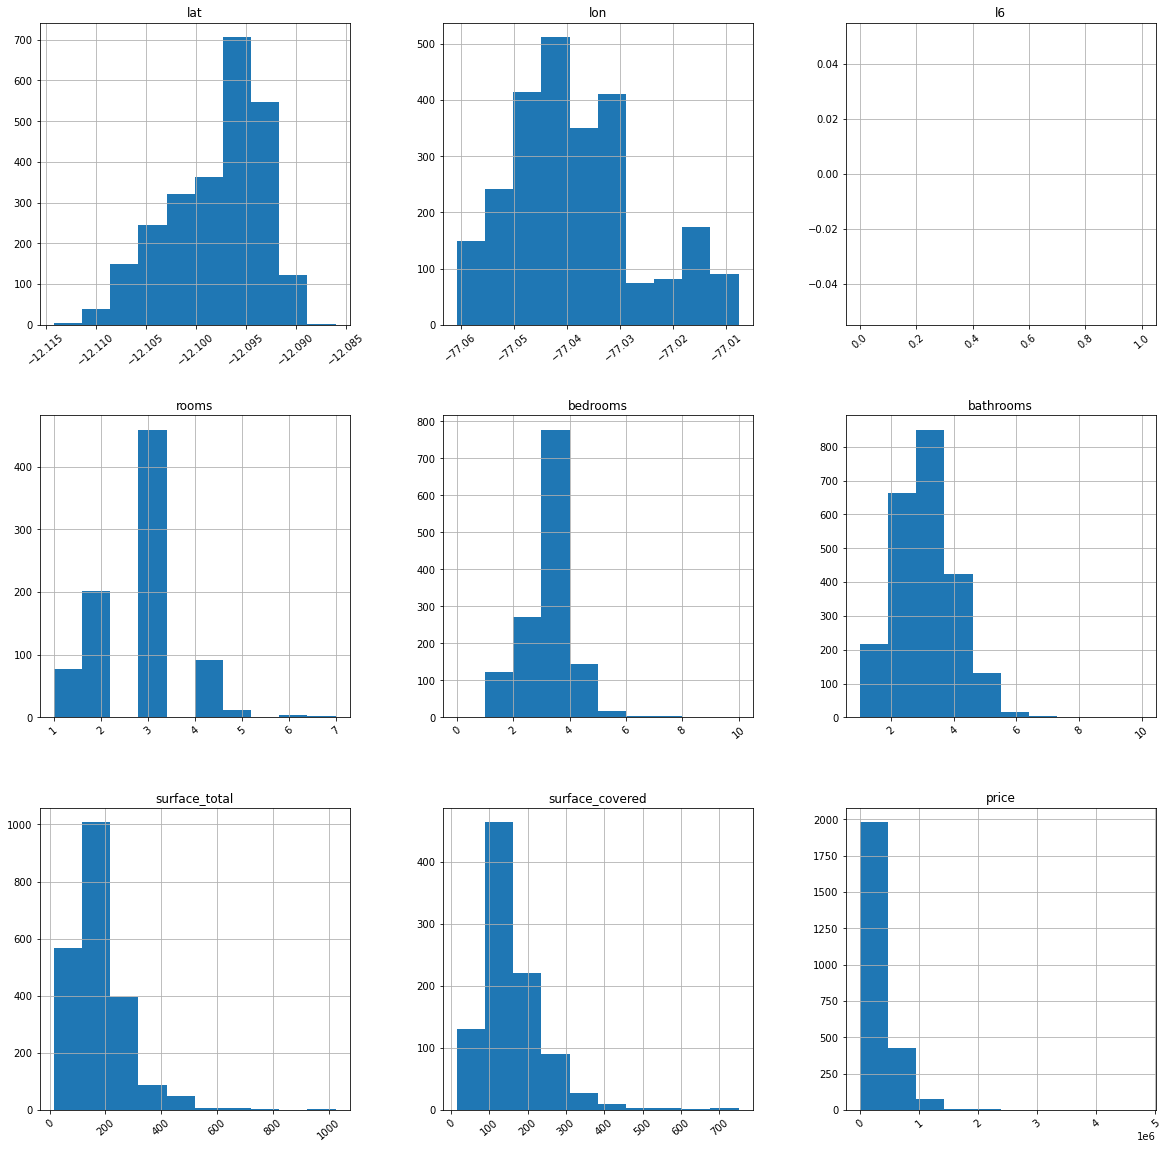

In [56]:
#Filter
dfp=dfp[dfp.l4.isin(['San Isidro'])]
dfp.shape 
dfp.hist(xrot=40,figsize=(20, 20))
print("")

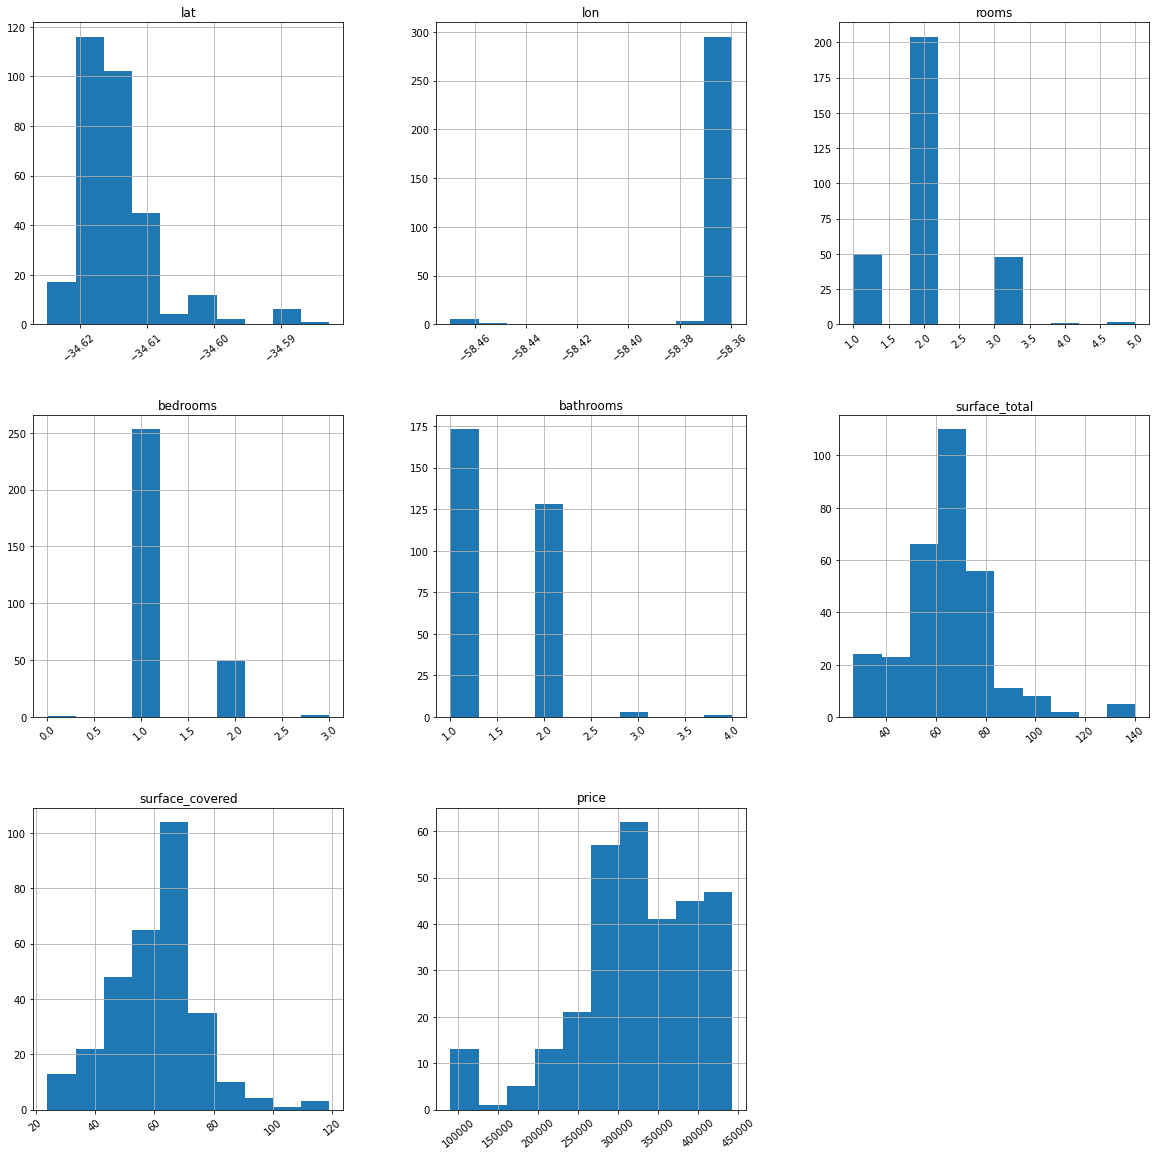

In [57]:
desafio2.hist(xrot=40,figsize=(20, 20))
print("")

In [58]:
Ag=desafio2.groupby('rooms', as_index=False).agg({"price": "mean","surface_total": "mean"})
print(Ag)

   rooms          price  surface_total
0    1.0  226760.280000      42.380000
1    2.0  348097.450980      67.622549
2    3.0  324297.916667      76.104167
3    4.0  335000.000000     116.000000
4    5.0  240000.000000     140.000000


In [59]:
Pe=dfp.groupby('rooms', as_index=False).agg({"price": "mean","surface_total": "mean"})
print(Pe)

   rooms          price  surface_total
0    1.0   84767.259740      75.120000
1    2.0  159522.308458     112.528205
2    3.0  274857.520697     172.020179
3    4.0  301299.108696     219.965517
4    5.0  312616.666667     251.727273
5    6.0  521875.000000     266.500000
6    7.0  295125.000000     257.000000


In [61]:
Pe=Pe[Pe.rooms<=5]
print(Pe)

   rooms          price  surface_total
0    1.0   84767.259740      75.120000
1    2.0  159522.308458     112.528205
2    3.0  274857.520697     172.020179
3    4.0  301299.108696     219.965517
4    5.0  312616.666667     251.727273


In [62]:
#control cols
Ag['pricePe'] = Pe['price'] 
Ag['surface_totalPe'] = Pe['surface_total'] 


Ag['prices?'] = np.where(Ag['price'] >= Pe['price'], 'True', 'False') 
Ag['surfaces?'] = np.where(Ag['surface_total'] >= Pe['surface_total'], 'True', 'False') 
print(Ag)

   rooms          price  surface_total        pricePe  surface_totalPe  \
0    1.0  226760.280000      42.380000   84767.259740        75.120000   
1    2.0  348097.450980      67.622549  159522.308458       112.528205   
2    3.0  324297.916667      76.104167  274857.520697       172.020179   
3    4.0  335000.000000     116.000000  301299.108696       219.965517   
4    5.0  240000.000000     140.000000  312616.666667       251.727273   

  prices? surfaces?  
0    True     False  
1    True     False  
2    True     False  
3    True     False  
4   False     False  


in `Prices?` should be False, and in `surfaces?` it should be true
We have 1 that agrees in price and surfaces there is none that suits.
Therefore, considering the number of rooms, the size of the property and the price, it is advisable to buy an apartment in San Isidro.

### 3. Machine Learning

### Dataset Preparation

In [64]:
#Carga de datos
data3=pd.read_csv("..\datasets\DS_Proyecto_01_Datos_Properati.csv")

In [68]:
#filter to delimit
data3=data3[data3.property_type.isin(['Departamento','Casa','PH']) &
              data3.l2.isin(['Capital Federal'])]

data3=data3[(data3.surface_total<=1000) & (data3.surface_total>=15)]

data3=data3[data3.price<=4000000]

dataML=data3.copy()
dataML=dataML[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price']]

dataML.dropna(inplace=True)
dataML.shape

(81019, 6)

In [90]:
#Dataset split
from sklearn.model_selection import train_test_split
X=dataML.drop(columns='price')
y=dataML['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [91]:
#Libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, mean_squared_error as mse
import seaborn as sns

According to what was reviewed in the exploratory analysis, the price can be predicted based on the total surface area, for which a Benchmark model is proposed with this approach.

 
2663 x + 9795


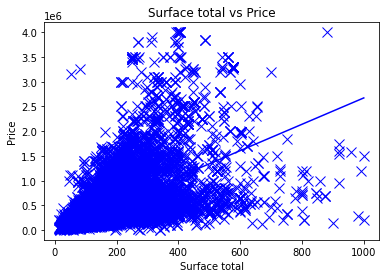

In [92]:
fit = np.poly1d(np.polyfit( X_train['surface_total'],y_train, 1))
#visualize 
A_mesh = np.linspace(min(X_train['surface_total']), max(X_train['surface_total']), 100)
plt.plot(X_train['surface_total'], y_train, 'bx', label='Data', ms=10)
plt.plot(A_mesh, fit(A_mesh), '-b', label='Linear fit')
plt.title("Surface total vs Price")
plt.xlabel('Surface total')
plt.ylabel('Price')
#la funcion lineal price=f(surface_total) quedaria de la forma:
print (fit) 

In [93]:
#predict
y_temp=np.array(((2663   *X_test.surface_total) + 9795))
y_pred = pd.Series(y_temp, name='price')

In [94]:
#metrics
mscbench=str(mse(y_test,y_pred))
print('Mean Squared Error Tree:', msc)

Mean Squared Error Tree: 25074789191.66286


Text(0, 0.5, 'Predicted Price by Benchmark model')

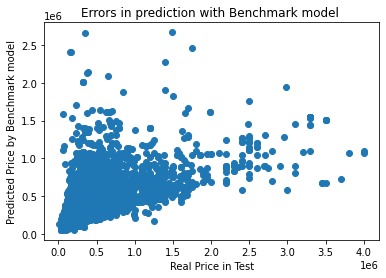

In [95]:
#Errors
plt.scatter(y_test,y_pred)
plt.title("Errors in prediction with Benchmark model ")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by Benchmark model')

### Decision trees

#### Initial Model with hyperparameters of choice

In [96]:
tree=DecisionTreeRegressor(max_depth=10,random_state=12)
tree.fit(X_train,y_train)
y_tree_pred = tree.predict(X_test)

The chosen metric is Mean Squared Error, it expresses the average prediction error of the model in units of the variable of interest, it can vary from 0 to ∞ and it is indifferent to the direction of the errors. It is a negatively oriented metric, which means that lower values are better.
MSE increases with the variance of the frequency distribution of the error magnitudes, so if we have large outliers, MSE will increase quite a bit and this makes it useful for when large errors are particularly undesirable.

In [97]:
msc=str(mse(y_test,y_tree_pred))
print('Mean Squared Error Tree:', msc)

Mean Squared Error Tree: 21381567090.83143


Text(0, 0.5, 'Predicted Price by model')

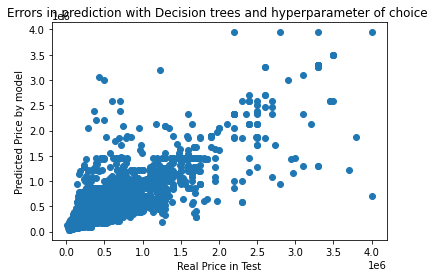

In [98]:
#errors display
plt.scatter(y_test,y_tree_pred)
plt.title("Errors in prediction with Decision trees and hyperparameter of choice ")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

#### Hyperparameter Optimization

In [99]:
##Functions to find the best hyperparameter, where each one will be tested according to the established range
max_depths = range(1,100)
number_neighbors = range(1,20)

def findhipertree(A,A_train,A_test,b,b_train,b_test):
    training_error = []
    for max_depth in max_depths:
        model_1 = DecisionTreeRegressor(max_depth=max_depth)
        model_1.fit(A, b)
        training_error.append(mse(b, model_1.predict(A)))
    testing_error = []
    for max_depth in max_depths:
        model_2 = DecisionTreeRegressor(max_depth=max_depth)
        model_2.fit(A_train, b_train)
        testing_error.append(mse(b_test, model_2.predict(A_test))) 
    return training_error,testing_error   


def findhiperknn(A,A_train,A_test,b,b_train,b_test):
    training_error = []
    for n_neighbors in number_neighbors:
        model_1 = KNeighborsRegressor(n_neighbors=n_neighbors)
        model_1.fit(A, b)
        training_error.append(mse(b, model_1.predict(A)))
    testing_error = []
    for n_neighbors in number_neighbors:
        model_2 = KNeighborsRegressor(n_neighbors=n_neighbors)
        model_2.fit(A_train, b_train)
        testing_error.append(mse(b_test, model_2.predict(A_test))) 
    return training_error,testing_error   


def dibujarparametro(x,y1,y2,xlabel):
    plt.plot(x, y1, color='blue', label='Training error')
    plt.plot(x, y2, color='green', label='Testing error')
    plt.xlabel(xlabel)
    plt.ylabel('Mean squared error')
    plt.title('Hyperparameter Tuning', pad=15, size=15)
    plt.legend()

Text(16.5, 20900099999, 'optimum = 20')

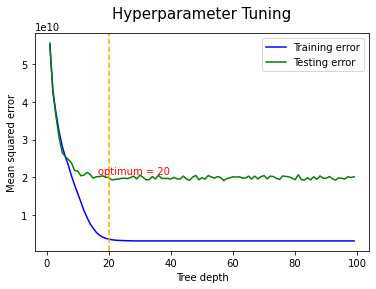

In [100]:
training_error, testing_error = findhipertree(X,X_train,X_test,y,y_train,y_test)
dibujarparametro(max_depths,training_error,testing_error,'Tree depth')
#the ideal depth is visualized
#from this point testing error varies slightly, while training remains constant.
plt.axvline(x=20, color='orange', linestyle='--')
plt.annotate('optimum = 20', xy=(16.5, 20900099999), color='red')

#### Model with ideal hyperparameter

In [101]:
treetuning=DecisionTreeRegressor(max_depth=20,random_state=12)
treetuning.fit(X_train,y_train)
y_tree_tuning_pred=treetuning.predict(X_test)
treemsc=str(mse(y_test,y_tree_tuning_pred))
print('Mean Squared Error Tree:', treemsc)

Mean Squared Error Tree: 19630361828.95704


Text(0, 0.5, 'Predicted Price by model')

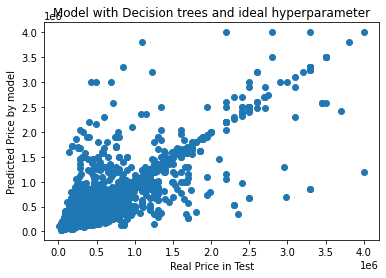

In [102]:
plt.scatter(y_test,y_tree_tuning_pred)
plt.title("Model with Decision trees and ideal hyperparameter")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

### K-Nearest Neighbor

#### Initial Model with hyperparameters of choice

In [103]:
#Modelo Inicial
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)
msc=str(mse(y_test,y_knn_pred))
print('Mean Squared Error knn:', msc)

Mean Squared Error knn: 25074789191.66286


Text(0, 0.5, 'Predicted Price by model')

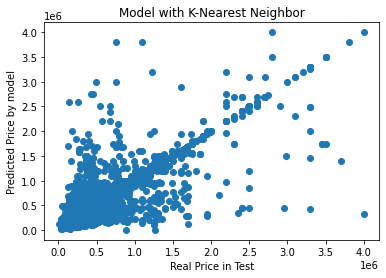

In [104]:
plt.scatter(y_test,y_knn_pred)
plt.title("Model with K-Nearest Neighbor")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

#### Hyperparameter Optimization

Text(3.1, 20000000000, 'optimum = 3')

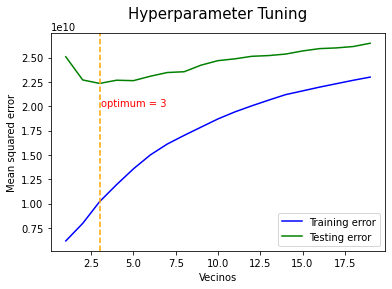

In [105]:
training_error, testing_error = findhiperknn(X,X_train,X_test,y,y_train,y_test)
dibujarparametro(number_neighbors,training_error,testing_error,'Vecinos')

plt.axvline(x=3, color='orange', linestyle='--')
plt.annotate('optimum = 3', xy=(3.1, 20000000000), color='red')

#### Model with ideal hyperparameter

In [106]:
knntuning=KNeighborsRegressor(n_neighbors=3)
knntuning.fit(X_train,y_train)
y_knntuning_pred = knntuning.predict(X_test)
knnmsc=str(mse(y_test,y_knntuning_pred))
print('Mean Squared Error knntuning:', knnmsc)

Mean Squared Error knntuning: 22339030440.769665


Text(0, 0.5, 'Predicted Price by model')

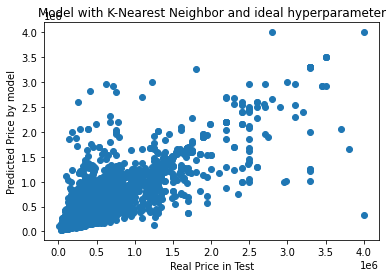

In [107]:
plt.scatter(y_test,y_knntuning_pred)
plt.title("Model with K-Nearest Neighbor and ideal hyperparameter")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

Up to this point, 4 models have been trained and tested, 2 for decision trees and 2 for close neighbors. In the first case, it was with chosen hyperparameters and the second with optimized hyperparameters.

### Conclusions

In [108]:
print('MSE Benchmark model :',mscbench)
print('MSE Decision trees and ideal hyperparameter:',treemsc)
print('MSE K-Nearest Neighbor and ideal hyperparameter:',knnmsc)

MSE Benchmark model : 47149096919.81795
MSE Decision trees and ideal hyperparameter: 19630361828.95704
MSE K-Nearest Neighbor and ideal hyperparameter: 22339030440.769665


Using the MSE metric, the one that has the lowest value, and therefore best fits its prediction, is the Decision Trees model, with a maximum depth of 20.
In the dataset, the best predictors, `surface_total` and `surface_covered`, are related, constituting a linear combination. the influence of each of them on the criterion could not be distinguished as they overlap with each other; the decision tree model is precisely the one that best handles this type of case and the one that has been appropriate up to this point.
Looking at the current dataset:

In [112]:
X.shape #(81019, 5)  
#unique rows
xuniques = X.drop_duplicates()
print(len(np.unique(X,axis=0)))
print(xuniques.shape)

15785
(15785, 5)


There are 15785 unique rows, where all the rest are the repetitions that can produce different values for Price. This is considering the columns(rooms,bedrooms,bathrooms,surface_total,surface_covered), in order to find a pattern that differentiates the duplicates that produce different prices, it would be ideal to have more columns from the original dataset, like: dates, coordinates, location in characters at 3 levels l1, l2 and l3, type of currency and title and description of the ad.

### Modeling with more variables

In [113]:
dataML1=data3.copy()
dataML1=dataML1[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price','lat','lon']]
dataML1.dropna(inplace=True)

#unique rows
duniques = dataML1.drop_duplicates()
print(len(np.unique(dataML1,axis=0)))
print(duniques.shape)


45544
(45544, 8)


In [114]:
#Division del dataset
X1=dataML1.drop(columns='price')
y1=dataML1['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)

***Decision Trees***

Text(15.5, 20900099999, 'optimum = 15')

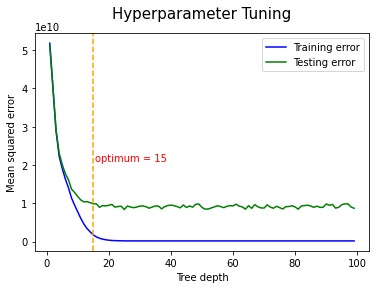

In [115]:
training_error1, testing_error1 = findhipertree(X1,X1_train,X1_test,y1,y1_train,y1_test)
dibujarparametro(max_depths,training_error1,testing_error1,'Tree depth')
plt.axvline(x=15, color='orange', linestyle='--')
plt.annotate('optimum = 15', xy=(15.5, 20900099999), color='red')

In [116]:
#Training
treetuning1=DecisionTreeRegressor(max_depth=15,random_state=12)
treetuning1.fit(X1_train,y1_train)
y1_tree_tuning_pred=treetuning1.predict(X1_test)
treemsc1=str(mse(y1_test,y1_tree_tuning_pred))
print('Mean Squared Error Tree:', treemsc1)

Mean Squared Error Tree: 9245267691.147598


Text(0, 0.5, 'Predicted Price by model')

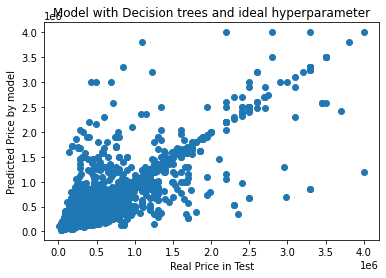

In [117]:
#Visualization
plt.scatter(y_test,y_tree_tuning_pred)
plt.title("Model with Decision trees and ideal hyperparameter")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

***K-Nearest Neighbor***

Text(2.1, 10099999990, 'optimum = 2')

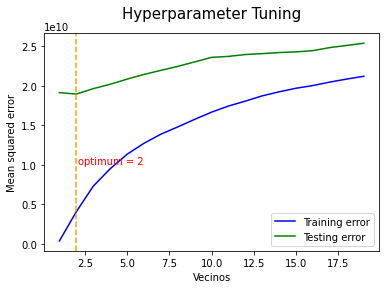

In [118]:
training_error1, testing_error1 = findhiperknn(X1,X1_train,X1_test,y1,y1_train,y1_test)
dibujarparametro(number_neighbors,training_error1,testing_error1,'Vecinos')

plt.axvline(x=2, color='orange', linestyle='--')
plt.annotate('optimum = 2', xy=(2.1, 10099999990), color='red')

In [119]:
knntuning1=KNeighborsRegressor(n_neighbors=2)
knntuning1.fit(X1_train,y1_train)
y1_knntuning_pred = knntuning1.predict(X1_test)
knnmsc1=str(mse(y1_test,y1_knntuning_pred))
print('Mean Squared Error knntuning:', knnmsc1)

Mean Squared Error knntuning: 18967487175.50679


Text(0, 0.5, 'Predicted Price by model')

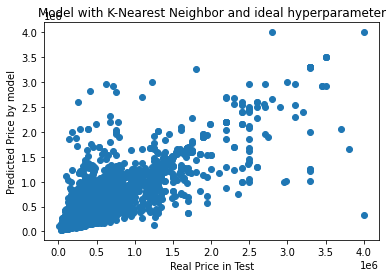

In [120]:
plt.scatter(y_test,y_knntuning_pred)
plt.title("Model with K-Nearest Neighbor and ideal hyperparameter")
plt.xlabel('Real Price in Test')
plt.ylabel('Predicted Price by model')

#### Final conclusion

In [121]:
print('MSE for best model(DT) for initial dataset :',treemsc)
print('MSE Decision trees and ideal hyperparameter with more variables:',knnmsc1)
print('MSE K-Nearest Neighbor and ideal hyperparameter with more variables:',treemsc1)

MSE for best model(DT) for initial dataset : 19630361828.95704
MSE Decision trees and ideal hyperparameter with more variables: 18967487175.50679
MSE K-Nearest Neighbor and ideal hyperparameter with more variables: 9245267691.147598


Presenting the lowest SE, the optimal model would continue to be Decision Trees, considering latitude and longitude, and with a maximum depth of 23.

Obs: Out of 81019 instances, 45544 were unique instances. To evaluate if the frequency of these duplicates affect the training of the model, the duplicate instances were removed, leaving only the first appearance. However, MSE:15803613634.899385 was found to be the best, being too high, for what is concluded that they should not be removed.